(537, 691, 3)


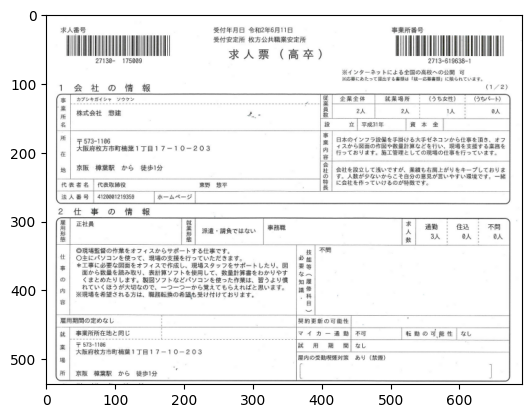

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

root_path = os.getcwd()
img_path = root_path+"\\configs\\image.png"
input_img = cv2.imread(img_path)
print(input_img.shape)
plt.imshow(input_img)

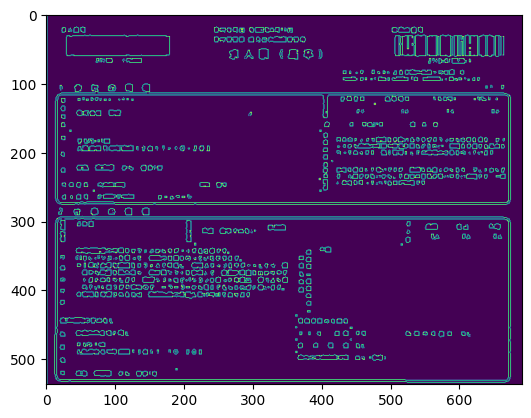

In [2]:

img = input_img.copy()

# Convert to Gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Make GaussianBlur (Normalized the colors)
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Perform Thresholding (Weak lines are disappeared)
thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)[1]

# Perform Bilateral Filter
gray = cv2.bilateralFilter(thresh, 1, 100, 150)

# Perform Canny Edges Detections (Clear lines are become more clear)
imgThreshold = cv2.Canny(gray, 20, 250)



plt.imshow(imgThreshold)


In [3]:
def reorder(myPoints):
    myPoints = myPoints.reshape((4, 2))
    myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
    add = myPoints.sum(1)

    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] = myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] = myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]

    return myPointsNew


[[[ 14 299]]

 [[ 18 532]]

 [[673 529]]

 [[668 295]]]

[[[ 16 124]]

 [[ 20 273]]

 [[671 271]]

 [[666 117]]]



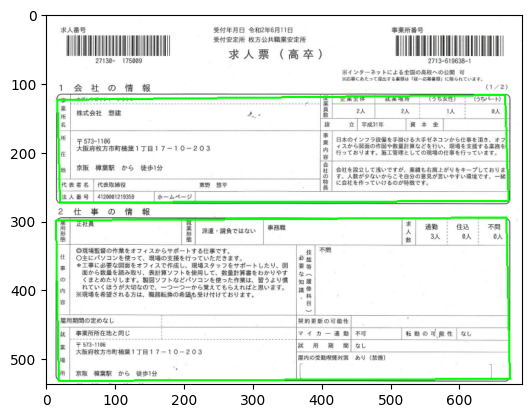

In [4]:


# FIND ALL CONTOURS
contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rgb = img.copy()
rect_list = []

for i in contours:
    area = cv2.contourArea(i)

    if area > 8000:
        peri = cv2.arcLength(i, True)

        approx = cv2.approxPolyDP(i, 0.02 * peri, True)
        if len(approx) == 4:

            cv2.drawContours(rgb, [approx], -1, (0, 255, 0), 2)
            print(approx[:4])
            print()
            rect_list.append(reorder(approx[:4]))
plt.imshow(rgb)

True

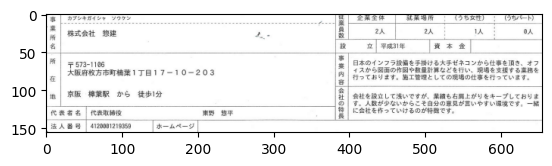

In [7]:
crop_img = img.copy()

i = 1

rect_result = rect_list

xindexs = [rect_result[i][0][0][0], rect_result[i][1][0][0], rect_result[i][2][0][0],
                rect_result[i][3][0][0]]

yindexs = [rect_result[i][0][0][1], rect_result[i][1][0][1], rect_result[i][2][0][1],
                rect_result[i][3][0][1]]


y1 = np.min(yindexs)
y2 = np.max(yindexs)
x1 = np.min(xindexs)
x2 = np.max(xindexs)


cropped_img = crop_img[y1:y2,x1:x2,:]
plt.imshow(cropped_img)


#Save image
cv2.imwrite("configs/block_1.png",cropped_img)

1. Create GCP account and Enable Vertex AI API and Cloud Vision API
2. Create service account with only Enable Vertex AI API user.
3. Download and add to cred

In [8]:
#!pip install python-dotenv
#!pip install google-cloud-vision

In [9]:
from dotenv import load_dotenv
print(load_dotenv())
print(os.getenv('GOOGLE_APPLICATION_CREDENTIALS'))


True
C:\Users\Happy\github\ML-in-Prod-batch-1\3_image_processing_techniques\OCR_proj\credentials\service_account.json


In [10]:


import io
from  google.cloud  import  vision
client = vision.ImageAnnotatorClient()
with io.open(img_path, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)


In [15]:
response = client.text_detection(image=image)
response

text_annotations {
  locale: "ja"
  description: "求人番号\n27130- 175009\n1 会社の情報\n事 カブシキガイシャ ソウケン\n受付年月日 令和2年6月11日\n受付安定所 枚方公共職業安定所\n求人票 (高卒)\n株式会社 建\n所\n名\n所\n573-1106\n大阪府枚方市町楠葉1丁目17-10-203\n在\n京阪樟葉駅 から 徒歩1分\n地\n代表者名 代表取締役\n東野 - 想平\n法人番号\n4120001219359\nホームページ\n2 雇用形態\n2 仕事の情報\n正社員\n就業形\n事務職\n派遣・請負ではない\n仕事の内容\n事業所番号\n2713-619638-1\n※インターネットによる全国の高校への公開可\n※応募にあたって提出する書類は一応書に限られています。\n(1/2)\n從業員数\n企菜全体\n就菜場所 (うち女性)\n(うちパート)\n2人\n2人\n人\n0人\n設\n立平成31年\n資本金\n事業内容 会社の特長\n◎現場監督の作業をオフィスからサポートする仕事です。\n○主にパソコンを使って、 現場の支援を行っていただきます。\n*工事に必要な図面をオフィスで作成し、 現場スタッフをサポートしたり、 図\n面から数量を読み取り、 表計算ソフトを使用して、 数量計算書をわかりやす\nくまとめたりします。 製図ソフトなどパソコンを使った作業は、習うより慣\nれていくほうが大切なので、一つ一つーから覚えてもらえればと思います。\n※現場を希望される方は、職務転換の希望も受け付けております。\n必\n要等\nな\n知限\n技能等履修科目\n雇用期間の定めなし\n事業所所在地と同じ\n573-1106\n業\n大阪府枚方市町楠葉1丁目17-10-203\n場\n所\n京阪 樟葉駅 から 徒歩1分\n日本のインフラ設備を手掛ける大手ゼネコンから仕事を頂き、 オフ\nィスから図面の作図や数量計算などを行い、 現場を支援する業務を\n行っております。 施工管理としての現場の仕事を行っています。\n会社を設立して浅いですが、 業績も右肩上がりをキープしておりま\nす。 人数が少ないからこそ自分の意見が言いやすい環境です。 一緒\nに会社を作っていけるのが特徴です。\n不問

In [13]:
import json
def load_template_frame(jsonTemplate_path):


    block_shapes = None
    template_infos = []

    with open(jsonTemplate_path, 'r') as json_file:
        data = json.load(json_file)
        block_shapes = data['shapes']

    for cur_bk in (block_shapes):
        label = cur_bk['label']
        points = cur_bk['points']
        x, y, x2, y2 = int(points[0][0]), int(points[0][1]), int(points[1][0]), int(points[1][1])

        template_infos.append([label, x, y, x2, y2])
    return template_infos



jsonTemplate_path = os.getcwd()+"\\templates\\block_1.json"
template_infos = load_template_frame(jsonTemplate_path)
print(template_infos)

[['1b_01', 1, 0, 47, 110], ['1b_02', 47, 0, 874, 31], ['1b_03', 48, 30, 872, 110], ['1b_04', 874, 2, 912, 76], ['1b_05', 910, 1, 1053, 31], ['1b_06', 911, 30, 1054, 75], ['1b_07', 1055, 1, 1201, 31], ['1b_08', 1054, 32, 1201, 75], ['1b_09', 1203, 1, 1349, 32], ['1b_10', 1203, 32, 1348, 77], ['1b_11', 1349, 0, 1498, 31], ['1b_12', 1498, 77, 1349, 30], ['1b_13', 874, 75, 995, 114], ['1b_14', 998, 75, 1158, 111], ['1b_15', 1158, 75, 1279, 112], ['1b_16', 1280, 76, 1498, 114], ['1b_17', 0, 109, 46, 259], ['1b_18', 47, 110, 873, 262], ['1b_19', 912, 207, 874, 113], ['1b_20', 914, 113, 1498, 208], ['1b_21', 873, 208, 911, 299], ['1b_22', 912, 207, 1498, 301], ['1b_23', 1, 259, 122, 297], ['1b_24', 124, 261, 872, 300], ['1b_25', 1, 297, 123, 334], ['1b_26', 123, 297, 323, 335], ['1b_27', 324, 299, 459, 335], ['1b_28', 460, 299, 1499, 335]]


In [22]:
def load_xmlResponsesText(response):
        responseText_infos = []
        document = response.full_text_annotation
        for page in document.pages:
            for block in page.blocks:
                for paragraph in block.paragraphs:
                    for word in paragraph.words:
                        for symbol in word.symbols:
                            bbox = symbol.bounding_box
                            xmin = bbox.vertices[0].x
                            ymin = bbox.vertices[0].y
                            xmax = bbox.vertices[2].x
                            ymax = bbox.vertices[2].y
                            xcenter = (xmin + xmax) / 2
                            ycenter = (ymin + ymax) / 2

                            text = symbol.text
                            responseText_infos.append([text, xcenter, ycenter])
        return responseText_infos

In [23]:
responseText_infos = load_xmlResponsesText(response)
responseText_infos

[['求', 25.5, 23.5],
 ['人', 34.5, 23.5],
 ['番', 43.5, 23.5],
 ['号', 53.5, 23.5],
 ['2', 73.5, 67.5],
 ['7', 77.5, 67.5],
 ['1', 83.0, 67.5],
 ['3', 87.5, 67.5],
 ['0', 92.5, 67.5],
 ['-', 98.0, 67.5],
 ['1', 111.0, 67.5],
 ['7', 116.5, 67.5],
 ['5', 121.5, 67.5],
 ['0', 126.5, 67.5],
 ['0', 130.5, 67.5],
 ['9', 136.0, 67.5],
 ['1', 25.0, 107.5],
 ['会', 46.5, 107.5],
 ['社', 71.0, 107.5],
 ['の', 96.0, 107.5],
 ['情', 120.0, 107.5],
 ['報', 144.5, 107.5],
 ['事', 24.0, 125.0],
 ['カ', 46.5, 123.5],
 ['ブ', 53.5, 123.5],
 ['シ', 60.0, 123.5],
 ['キ', 65.5, 123.5],
 ['ガ', 73.0, 123.5],
 ['イ', 78.5, 123.5],
 ['シ', 85.5, 123.5],
 ['ャ', 91.5, 123.5],
 ['ソ', 104.5, 123.5],
 ['ウ', 111.5, 123.5],
 ['ケ', 119.0, 123.5],
 ['ン', 125.0, 123.5],
 ['受', 246.5, 23.5],
 ['付', 256.5, 23.5],
 ['年', 266.0, 23.5],
 ['月', 274.5, 23.5],
 ['日', 284.5, 23.5],
 ['令', 298.0, 23.5],
 ['和', 307.5, 23.5],
 ['2', 314.0, 23.5],
 ['年', 321.5, 23.5],
 ['6', 327.0, 23.5],
 ['月', 334.5, 23.5],
 ['1', 341.5, 23.5],
 ['1', 347.5, 23.

In [25]:
def match_Template(template_infos,responseText_infos):
    result_dict = {}
    for bbox in template_infos:
        label, xmin, ymin, xmax, ymax = bbox[0], bbox[1], bbox[2], bbox[3], bbox[4]
        texts = ''
        for text_info in responseText_infos:
            text = text_info[0]
            xcenter = text_info[1]
            ycenter = text_info[2]
            if xmin <= xcenter <= xmax and ymin <= ycenter <= ymax:
                texts += text
            result_dict[label] = str(texts)

    
    return  result_dict
result_dict = match_Template(template_infos,responseText_infos)
(result_dict)



{'1b_01': '求人番1会',
 '1b_02': '号受付年月日令和2年6月11日事業所番号',
 '1b_03': '27130-175009社の情報受付安定所枚方公共職業安定所求人票(高卒)2713-619638-1※インターネットによる全国の高校への公開可※応募にあたって提出する書類は一応書に限られています。(1/2)',
 '1b_04': '',
 '1b_05': '',
 '1b_06': '',
 '1b_07': '',
 '1b_08': '',
 '1b_09': '',
 '1b_10': '',
 '1b_11': '',
 '1b_12': '',
 '1b_13': '',
 '1b_14': '',
 '1b_15': '',
 '1b_16': '',
 '1b_17': '事所名所在地代表者',
 '1b_18': 'ブシキガイシャソウケン株式会社建573-1106大阪府枚方市町楠葉1丁目17-10-203京阪樟葉駅から徒歩1分名代表取締役東野-想平從業員数企菜全体就菜場所(うち女性)(うちパート)2人2人人0人設立平成31年資本金事業内容会社の特長日本のインフラ設備を手掛ける大手ゼネコンから仕事を頂き、オフィスから図面の作図や数量計算などを行い、現場を支援する業務を行っております。施工管理としての現場の仕事を行っています。会社を設立して浅いですが、業績も右肩上がりをキープしております。人数が少ないからこそ自分の意見が言いやすい環境です。一緒に会社を作っていけるのが特徴です。',
 '1b_19': '',
 '1b_20': '',
 '1b_21': '',
 '1b_22': '',
 '1b_23': '法人番号41200012193522仕事の情',
 '1b_24': '9ホームページ報',
 '1b_25': '雇用形態正社員',
 '1b_26': '就業形派遣・請負ではない',
 '1b_27': '事務職',
 '1b_28': '求人拉通勤3人住込0人不問0人'}